In [1]:
import sys
sys.path.append('../utils')
from nd_tools import scale_img

import rasterio
import matplotlib.pyplot as plt
import numpy as np
from pathlib import Path
from tqdm import tqdm
from sklearn.cluster import KMeans


In [2]:
data_dir = Path('../data')
coh_tifs = sorted(list(data_dir.glob('./*coh*.tif')))
coh_tifs

[PosixPath('../data/alos_coh_hh.tif'), PosixPath('../data/alos_coh_hv.tif')]

In [3]:
def open_one(path):
    with rasterio.open(path) as ds:
        band = ds.read(1)
    return band

coherence_bands = list(map(open_one, coh_tifs))

Text(0.5, 1.0, 'HV')

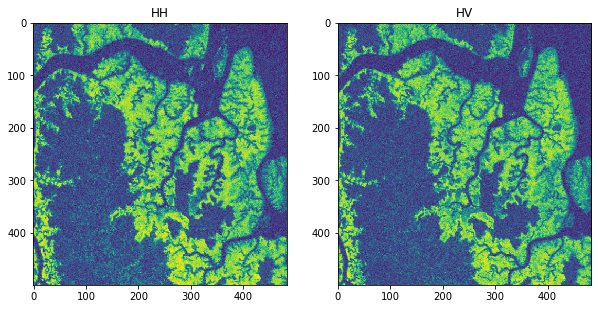

In [4]:
fig, ax = plt.subplots(1, 2, figsize=(10, 5))
ax[0].imshow(coherence_bands[0])
ax[0].set_title('HH')
ax[1].imshow(coherence_bands[1])
ax[1].set_title('HV')

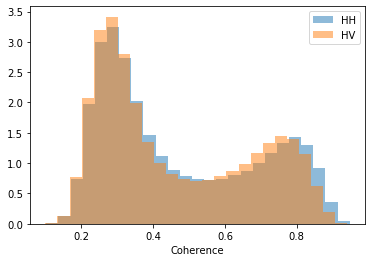

In [5]:
plt.hist(coherence_bands[0].ravel(),
         bins=25,
         density=True,
         label='HH',
         alpha=.5)
plt.hist(coherence_bands[1].ravel(),
         bins=25,
         density=True,
         label='HV',
         alpha=.5)
plt.xlabel('Coherence')
plt.legend()


Add coherence to the k-means.


In [6]:
## Answer

model = KMeans(n_clusters=3, 
               random_state=0)
X_train = np.zeros((coherence_bands[0].size, 2))
X_train[:, 0] = coherence_bands[0].ravel()
X_train[:, 1] = coherence_bands[1].ravel()
model.fit(X_train)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=3, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=0, tol=0.0001, verbose=0)

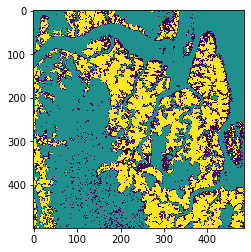

In [7]:
## Answer

classes = model.labels_.reshape(coherence_bands[0].shape)
plt.imshow(classes)

# Combining Coherence and Backscatter

Try k-means using *coherence and backscatter!*

In [8]:
data_dir = Path('../data')
tv_tifs = sorted(list(data_dir.glob('./*tv.tif')))
tv_tifs

[PosixPath('../data/alos_hh_tv.tif'), PosixPath('../data/alos_hv_tv.tif')]

In [9]:
backscatter_bands = list(map(open_one, tv_tifs))

In [10]:
model = KMeans(n_clusters=3, 
               random_state=0)
X_train = np.zeros((coherence_bands[0].size, 4))
X_train[:, 0] = coherence_bands[0].ravel()
X_train[:, 1] = coherence_bands[1].ravel()
X_train[:, 2] = backscatter_bands[0].ravel()
X_train[:, 3] = backscatter_bands[1].ravel()
model.fit(X_train)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=3, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=0, tol=0.0001, verbose=0)

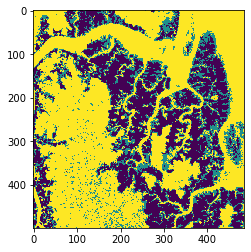

In [11]:
classes = model.labels_.reshape(backscatter_bands[0].shape)
plt.imshow(classes)

# Excercise 1

Improve the classification by scaling each band to be between 0 and 1.

In [12]:
## Answer

all_bands = backscatter_bands + coherence_bands
all_bands = list(map(scale_img, all_bands))

In [13]:
## Answer

model = KMeans(n_clusters=3, 
               random_state=0)
for k in range(len(all_bands)):
    X_train[:, k] = all_bands[k].ravel()
model.fit(X_train)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=3, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=0, tol=0.0001, verbose=0)

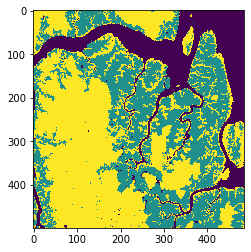

In [14]:
## Answer

classes = model.labels_.reshape(backscatter_bands[0].shape)
plt.imshow(classes)

In [15]:
## Answer
with rasterio.open(tv_tifs[0]) as ds:
    profile = ds.profile

profile['dtype'] = 'int32'
profile['nodata'] = None
with rasterio.open('classes.tif', 'w', **profile) as ds:
    ds.write(classes, 1)

# Acknowledgements

A portion of this research was performed at the Jet Propulsion Laboratory, California Institute of Technology. Copyright 2019 California Institute of Technology. US Government Support Acknowledged.